In [1]:
## Connect Google drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [2]:
#Colab
path = "/content/gdrive/MyDrive/Air_Quality/Final_dfs"

In [3]:
#importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import matplotlib.cm as cm
import statistics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import random

from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

from sklearn.manifold import LocallyLinearEmbedding
from sklearn import manifold, datasets

from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler
from sklearn import preprocessing

from sklearn.feature_selection\
    import VarianceThreshold
from sklearn.feature_selection import VarianceThreshold

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import roc_auc_score, plot_roc_curve, confusion_matrix
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix


import pandas as pd
import csv
from multiprocessing import Process

from os.path import exists

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
#from tests import feat_sel_col_test

In [4]:
#path = "Final_dfs"

In [5]:
df = pd.read_csv(f"{path}/Final_df_classification.csv")
df

,powiat_voivod,DATE,CC,FG,HU,RR,SD,TG,voivodship,[animal stock] total,...,dayofweek,season,CAQI_lag1,holiday_name,is_school_holiday,is_lockdown,is_have_coalplant,rolling7_CAQI,rolling30_CAQI,rolling90_CAQI
0,"powiat aleksandrowski, kujawsko-pomorskie",2017-01-01,4.746750,0.0,88.4,1.0,0.0,1.8,kujawsko-pomorskie,44.997895,...,6,Winter,24.968064,New Year's Day,0.0,0.0,0.0,24.968064,28.884791,47.077522
1,"powiat aleksandrowski, kujawsko-pomorskie",2017-01-02,6.167555,36.8,88.4,1.0,0.0,0.5,kujawsko-pomorskie,44.997895,...,0,Winter,24.968064,Non Holiday,0.0,0.0,0.0,24.968064,28.884791,47.077522
2,"powiat aleksandrowski, kujawsko-pomorskie",2017-01-03,5.198131,0.0,88.4,63.0,0.0,0.3,kujawsko-pomorskie,44.997895,...,1,Winter,17.943745,Non Holiday,0.0,0.0,0.0,21.455904,28.884791,47.077522
3,"powiat aleksandrowski, kujawsko-pomorskie",2017-01-04,8.432231,64.2,88.4,10.0,0.0,1.2,kujawsko-pomorskie,44.997895,...,2,Winter,17.500000,Non Holiday,0.0,0.0,0.0,20.137270,28.884791,47.077522
4,"powiat aleksandrowski, kujawsko-pomorskie",2017-01-05,4.992977,0.0,82.4,2.0,1.0,-3.9,kujawsko-pomorskie,44.997895,...,3,Winter,23.941667,Non Holiday,0.0,0.0,0.0,21.088369,28.884791,47.077522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361543,"powiat żywiecki, śląskie",2021-12-27,5.000000,8.5,78.1,0.0,3.0,-9.5,śląskie,18.061538,...,0,Winter,89.138889,National Day of the Victorious Greater Poland ...,1.0,0.0,0.0,47.363294,49.618889,40.127948
361544,"powiat żywiecki, śląskie",2021-12-28,7.000000,10.0,86.2,4.0,3.0,-5.6,śląskie,18.061538,...,1,Winter,94.055556,Non Holiday,1.0,0.0,0.0,58.442659,51.460741,40.859676
361545,"powiat żywiecki, śląskie",2021-12-29,7.000000,5.0,88.7,2.0,3.0,-1.5,śląskie,18.061538,...,2,Winter,98.250000,Non Holiday,1.0,0.0,0.0,63.630159,52.950324,41.588009
361546,"powiat żywiecki, śląskie",2021-12-30,8.000000,8.5,88.8,17.0,2.0,3.4,śląskie,18.061538,...,3,Winter,35.300000,Non Holiday,1.0,0.0,0.0,57.184921,53.293657,41.690231


In [6]:
labels = df.pop("CAQI_level")
df["CAQI_level"] = labels

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361548 entries, 0 to 361547
Columns: 131 entries, powiat_voivod to CAQI_level
dtypes: float64(120), int64(5), object(6)
memory usage: 361.3+ MB


In [8]:
list(df.columns)

['powiat_voivod',
 'DATE',
 'CC',
 'FG',
 'HU',
 'RR',
 'SD',
 'TG',
 'voivodship',
 '[animal stock] total',
 '[area by land] utilised agricultural area',
 '[area by land] forests',
 '[area by land] residential areas',
 '[area by land] industrial lands',
 '[area by land] recreational and rest areas',
 '[area by land] lands under waters',
 '[area by land] wasteland',
 '[area by land] other area',
 '[emission of particulates] fugitive',
 '[emission of particulates] fuel combustion',
 '[emission of particulates] cement/lime and refractory materials',
 '[emission of particulates] silicon',
 '[emission of particulates] chemical fertilizers',
 '[emission of particulates] surface-active agents',
 '[emission of particulates] carbon and graphite, soot',
 '[emission of pollutant gases] fugitive',
 '[emission of pollutant gases] sulphur dioxide',
 '[emission of pollutant gases] nitrogen oxides',
 '[emission of pollutant gases] carbon monoxide',
 '[emission of pollutant gases] carbon dioxide',
 '[

In [9]:
df['CAQI_level']

0         vlow
1         vlow
2         vlow
3         vlow
4          low
          ... 
361543    high
361544    high
361545     low
361546    vlow
361547    vlow
Name: CAQI_level, Length: 361548, dtype: object

#### Describe dataset 

In [10]:
df.describe()

,CC,FG,HU,RR,SD,TG,[animal stock] total,[area by land] utilised agricultural area,[area by land] forests,[area by land] residential areas,...,month,year,dayofweek,CAQI_lag1,is_school_holiday,is_lockdown,is_have_coalplant,rolling7_CAQI,rolling30_CAQI,rolling90_CAQI
count,361548.000000,361548.000000,361548.000000,361548.000000,361548.000000,361548.000000,361548.000000,361548.000000,361548.000000,361548.000000,...,361548.000000,361548.000000,361548.000000,361548.000000,361548.000000,361548.000000,361548.000000,361548.000000,361548.000000,361548.000000
mean,5.145030,21.941411,77.794207,12.271548,2.906702,9.052517,27.718409,2.501735,1.272449,0.054940,...,6.523549,2019.000548,2.998905,30.081632,0.263965,0.119934,0.078374,30.081672,30.127836,30.646344
std,2.155393,24.617713,12.294678,37.544859,15.571407,8.297177,17.969390,1.921151,1.050208,0.061423,...,3.448538,1.414022,2.000002,16.086525,0.440781,0.324885,0.268760,13.031975,11.247590,10.877159
min,0.000000,-1.527076,8.000000,0.000000,0.000000,-24.966667,7.410853,0.060930,0.021150,0.000478,...,1.000000,2017.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.135448,1.245824,8.492928
25%,4.000000,0.000000,69.722222,0.000000,0.000000,2.800000,14.778846,0.802022,0.424217,0.020907,...,4.000000,2018.000000,1.000000,19.380000,0.000000,0.000000,0.000000,21.234335,22.405122,23.269781
50%,5.356921,19.066667,79.020000,0.000000,0.000000,8.900000,21.265868,2.348218,1.083526,0.043539,...,7.000000,2019.000000,3.000000,26.109961,0.000000,0.000000,0.000000,27.325464,28.026838,28.595118
75%,7.000000,32.000000,87.109718,4.000000,0.000000,15.900000,43.626866,3.761550,1.804233,0.069444,...,10.000000,2020.000000,5.000000,35.800000,1.000000,0.000000,0.000000,35.642857,35.456015,35.692652
max,10.500783,308.666667,102.452994,1002.000000,237.000000,30.300000,81.687500,12.409137,5.523696,0.554976,...,12.000000,2021.000000,6.000000,101.000000,1.000000,1.000000,1.000000,101.000000,94.231212,87.642130


In [11]:
#check unique CAQI levels
df["CAQI_level"].unique()

array(['vlow', 'low', 'medium', 'high', 'vhigh'], dtype=object)

#### Check for columns with string data types 

In [12]:
c = 0
co = 0
l = []
for col in df.columns:
    #print(col)
    c += 1
    datatype = df[col].dtype  #get column datatype
    if datatype == "int64" or datatype == "float64":  
        co += 1
    else:
        l.append(col)
        
print(c, co)
print(l)

131 125
['powiat_voivod', 'DATE', 'voivodship', 'season', 'holiday_name', 'CAQI_level']


In [13]:
#remove powiats, vovoidoships and holidays
df.pop('powiat_voivod')
df.pop('holiday_name')
df.pop('voivodship')

0         kujawsko-pomorskie
1         kujawsko-pomorskie
2         kujawsko-pomorskie
3         kujawsko-pomorskie
4         kujawsko-pomorskie
                 ...        
361543               śląskie
361544               śląskie
361545               śląskie
361546               śląskie
361547               śląskie
Name: voivodship, Length: 361548, dtype: object

In [14]:
df

,DATE,CC,FG,HU,RR,SD,TG,[animal stock] total,[area by land] utilised agricultural area,[area by land] forests,...,dayofweek,season,CAQI_lag1,is_school_holiday,is_lockdown,is_have_coalplant,rolling7_CAQI,rolling30_CAQI,rolling90_CAQI,CAQI_level
0,2017-01-01,4.746750,0.0,88.4,1.0,0.0,1.8,44.997895,1.718015,0.631701,...,6,Winter,24.968064,0.0,0.0,0.0,24.968064,28.884791,47.077522,vlow
1,2017-01-02,6.167555,36.8,88.4,1.0,0.0,0.5,44.997895,1.718015,0.631701,...,0,Winter,24.968064,0.0,0.0,0.0,24.968064,28.884791,47.077522,vlow
2,2017-01-03,5.198131,0.0,88.4,63.0,0.0,0.3,44.997895,1.718015,0.631701,...,1,Winter,17.943745,0.0,0.0,0.0,21.455904,28.884791,47.077522,vlow
3,2017-01-04,8.432231,64.2,88.4,10.0,0.0,1.2,44.997895,1.718015,0.631701,...,2,Winter,17.500000,0.0,0.0,0.0,20.137270,28.884791,47.077522,vlow
4,2017-01-05,4.992977,0.0,82.4,2.0,1.0,-3.9,44.997895,1.718015,0.631701,...,3,Winter,23.941667,0.0,0.0,0.0,21.088369,28.884791,47.077522,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361543,2021-12-27,5.000000,8.5,78.1,0.0,3.0,-9.5,18.061538,4.250081,2.765926,...,0,Winter,89.138889,1.0,0.0,0.0,47.363294,49.618889,40.127948,high
361544,2021-12-28,7.000000,10.0,86.2,4.0,3.0,-5.6,18.061538,4.250081,2.765926,...,1,Winter,94.055556,1.0,0.0,0.0,58.442659,51.460741,40.859676,high
361545,2021-12-29,7.000000,5.0,88.7,2.0,3.0,-1.5,18.061538,4.250081,2.765926,...,2,Winter,98.250000,1.0,0.0,0.0,63.630159,52.950324,41.588009,low
361546,2021-12-30,8.000000,8.5,88.8,17.0,2.0,3.4,18.061538,4.250081,2.765926,...,3,Winter,35.300000,1.0,0.0,0.0,57.184921,53.293657,41.690231,vlow


In [15]:
#Function for plotting bar, pie, and other charts
def plot_dist(df, col_name, color):
    """
    Function for plotting based on column name
    Input parameters:- 
    df = dataframe
    col_name = column name
    color = type of plot (pie, box, bar)"""
    
    cmap = cm.get_cmap('RdYlGn')
    
    
    image =  df[col_name].value_counts().plot(kind=color, colormap = cmap)
    sns.distplot(df[col_name].value_counts())
    image.figure.savefig(f"{col_name}.jpg")
    
    return image

<ipython-input-15-189ccc34f0db>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('RdYlGn')
<ipython-input-15-189ccc34f0db>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col_name].value_counts())


<Axes: xlabel='CAQI_level', ylabel='Density'>

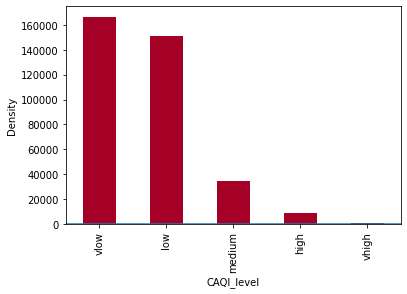

In [16]:
plot_dist(df, "CAQI_level", 'bar')

#### Check percentage proportion of each CAQI levels  

In [17]:
#check percentage of malignant and benign categories
count_1 = len(df[df['CAQI_level'] == 'vlow'])
count_2 = len(df[df['CAQI_level'] == 'low'])
count_3 = len(df[df['CAQI_level'] == 'medium'])
count_4 = len(df[df['CAQI_level'] == 'high'])
count_5 = len(df[df['CAQI_level'] == 'vhigh'])
pct_of_1 = count_1/(count_1 + count_2 + count_3 + count_4 + count_5)
pct_of_2 = count_2/(count_1 + count_2 + count_3 + count_4 + count_5)
pct_of_3 = count_3/(count_1 + count_2 + count_3 + count_4 + count_5)
pct_of_4 = count_4/(count_1 + count_2 + count_3 + count_4 + count_5)
pct_of_5 = count_5/(count_1 + count_2 + count_3 + count_4 + count_5)
print("percentage of vlow is", pct_of_1*100)
print("percentage of low is", pct_of_2*100)
print("percentage of medium is", pct_of_3*100)
print("percentage of high is", pct_of_4*100)
print("percentage of vhigh is", pct_of_5*100)

percentage of vlow is 46.061657096706384
percentage of low is 41.82791773153219
percentage of medium is 9.522940245831812
percentage of high is 2.3404914423534358
percentage of vhigh is 0.246993483576178


#### check for null values 

In [18]:
df.isnull().sum()

DATE                 0
CC                   0
FG                   0
HU                   0
RR                   0
                    ..
is_have_coalplant    0
rolling7_CAQI        0
rolling30_CAQI       0
rolling90_CAQI       0
CAQI_level           0
Length: 128, dtype: int64

#### Check for outliers 

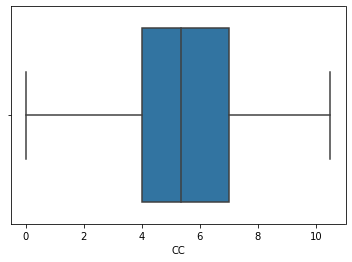

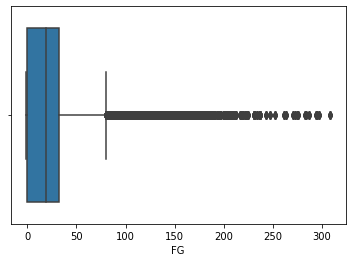

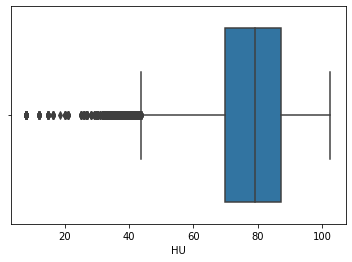

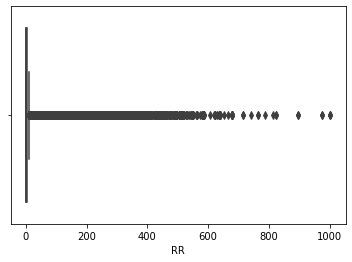

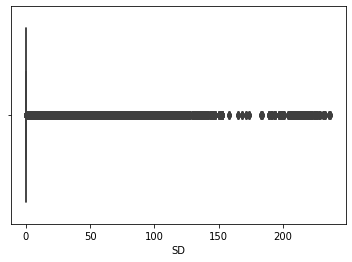

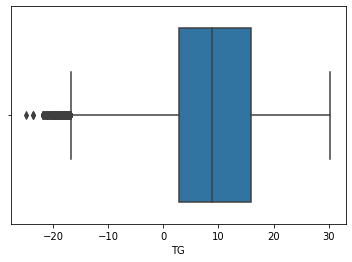

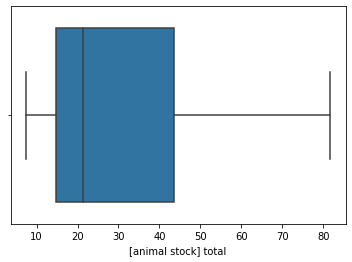

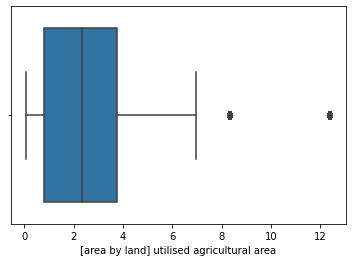

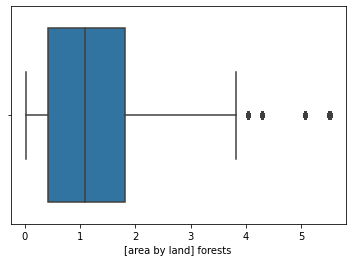

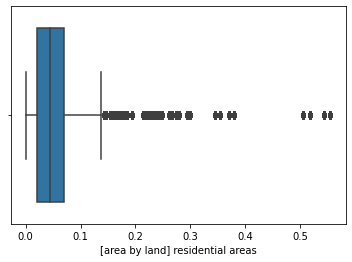

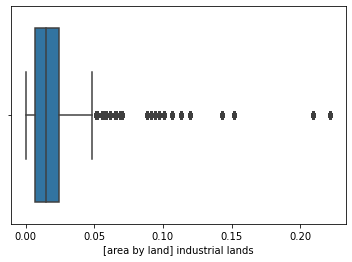

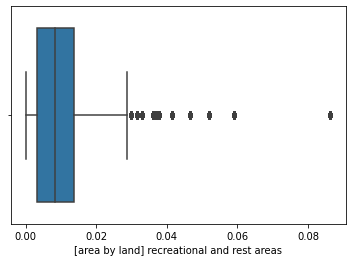

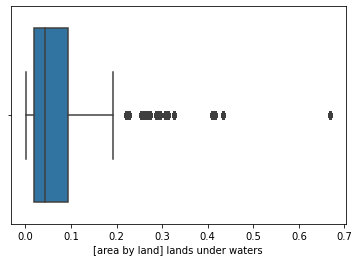

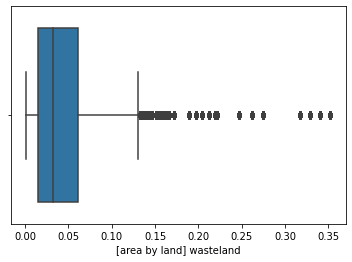

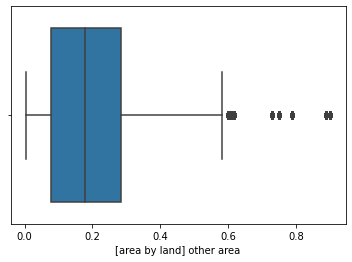

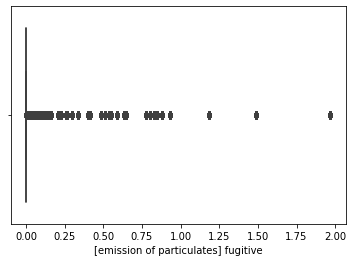

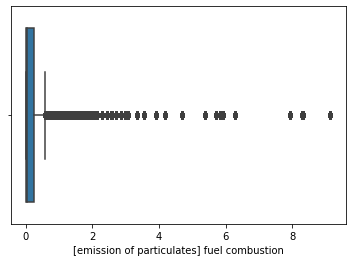

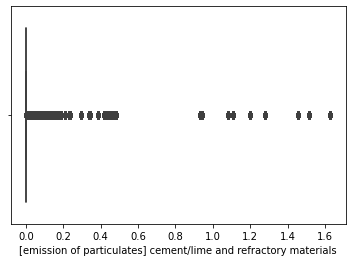

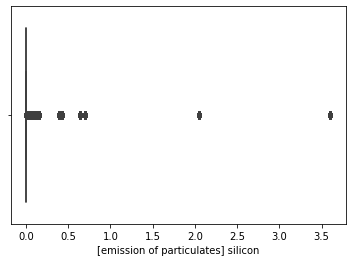

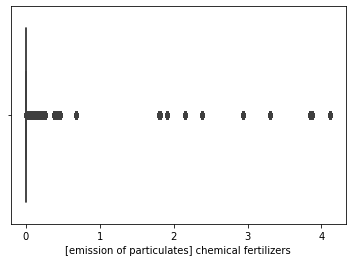

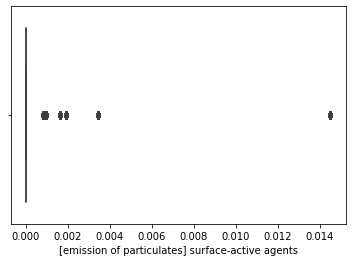

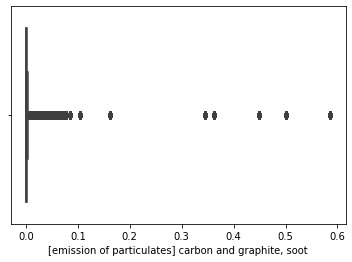

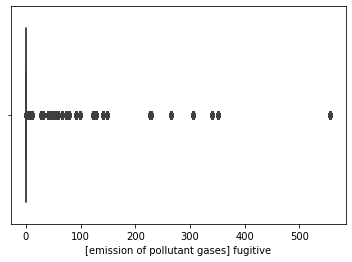

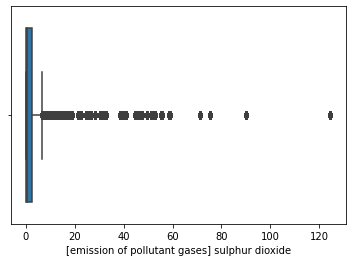

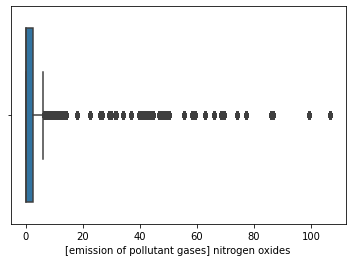

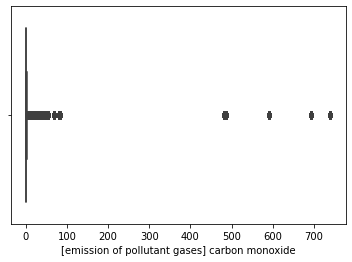

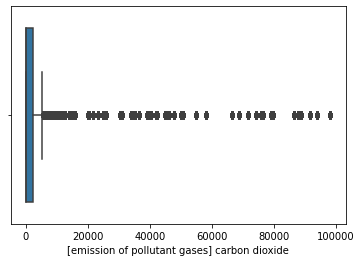

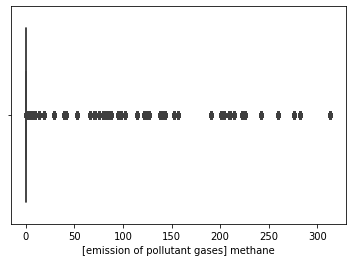

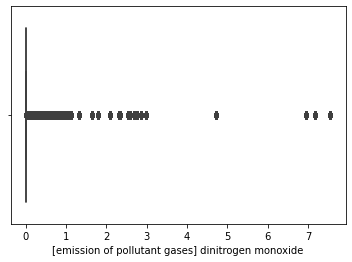

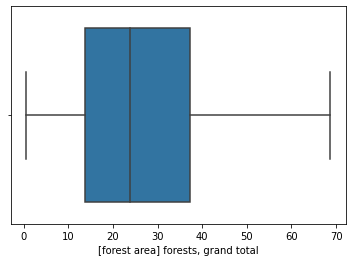

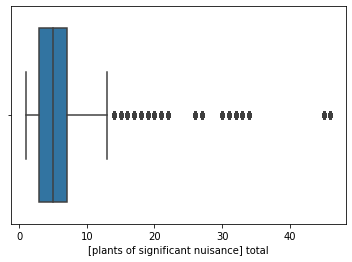

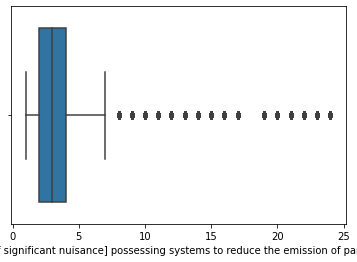

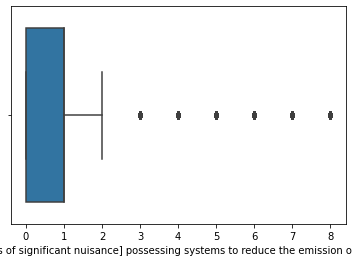

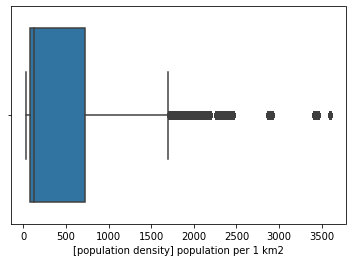

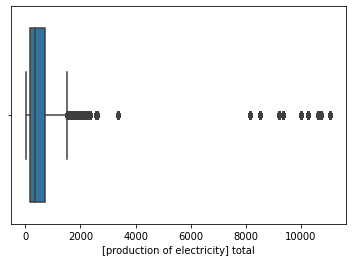

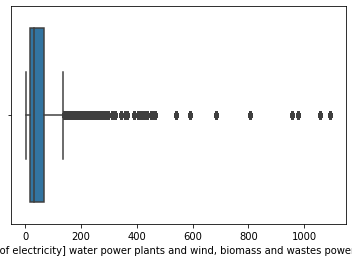

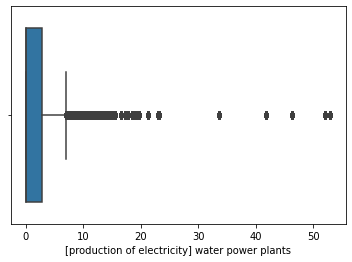

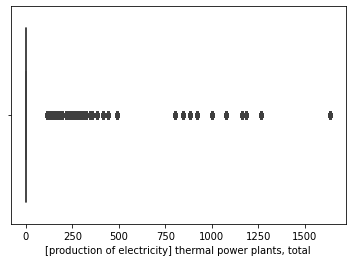

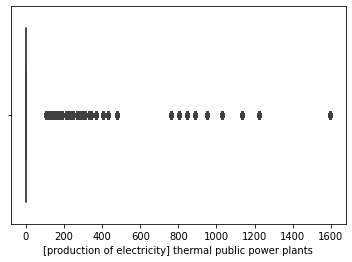

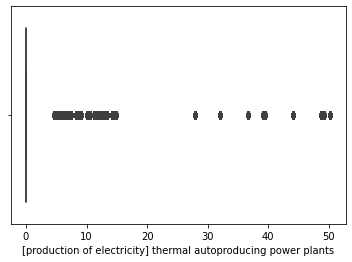

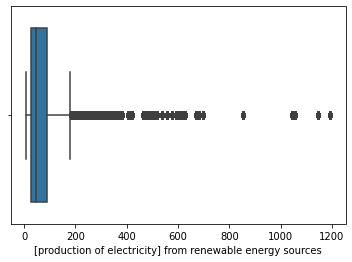

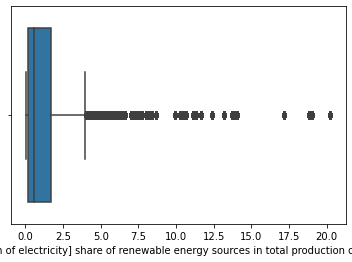

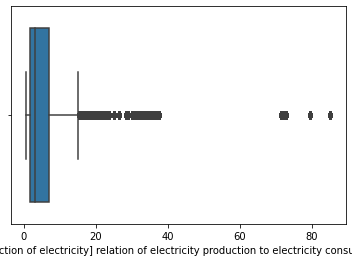

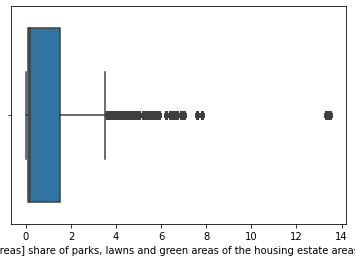

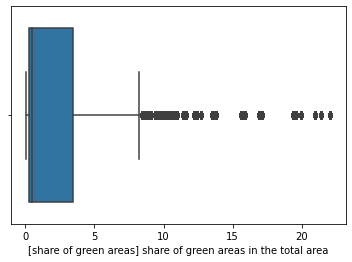

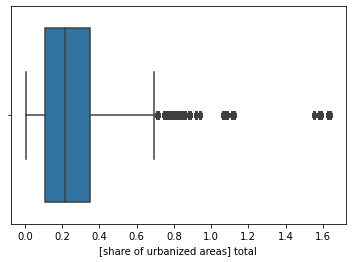

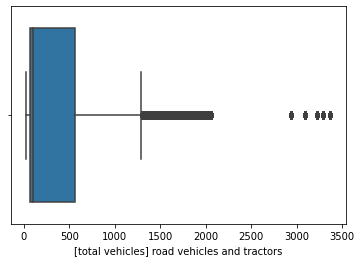

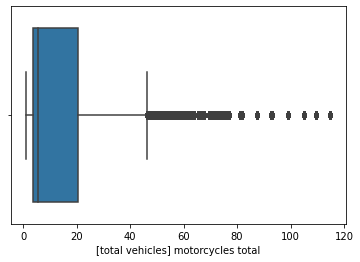

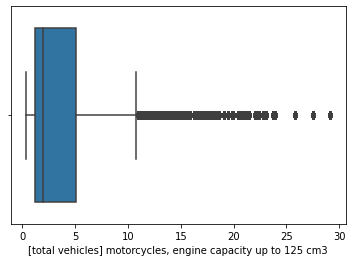

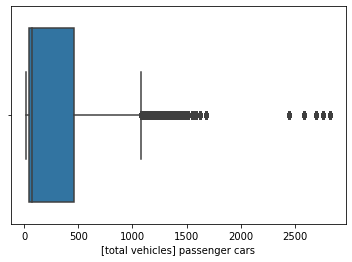

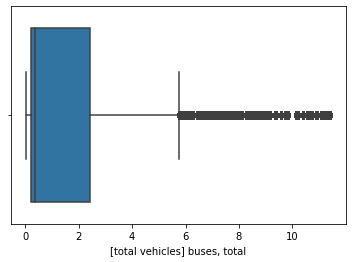

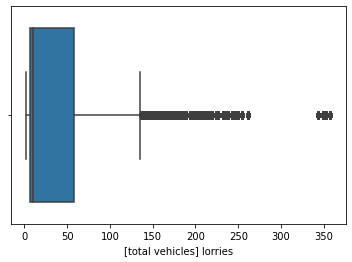

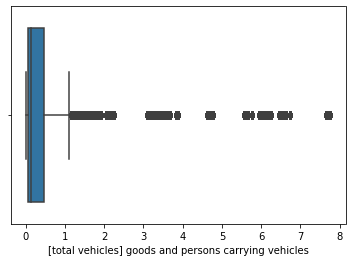

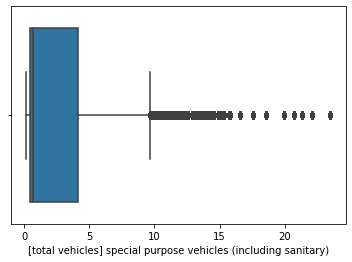

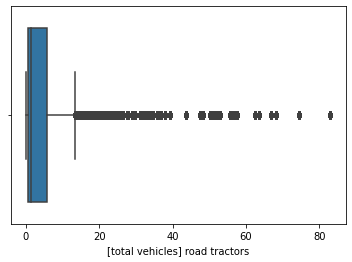

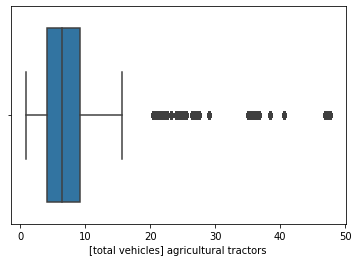

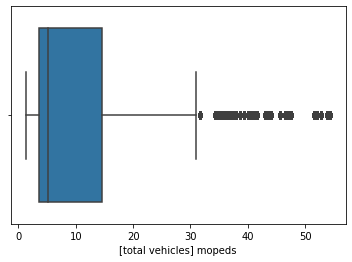

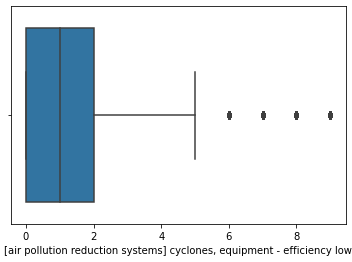

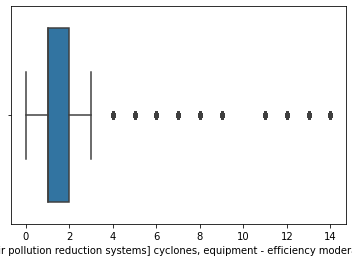

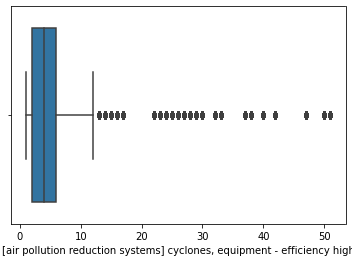

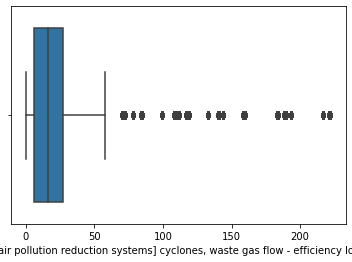

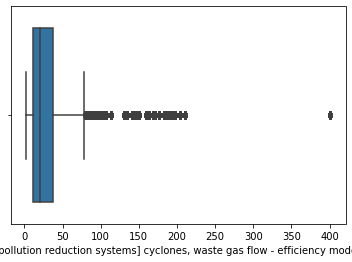

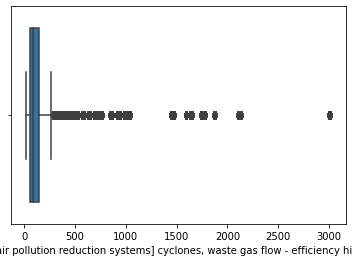

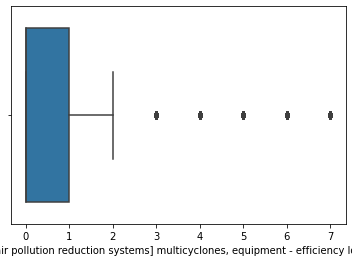

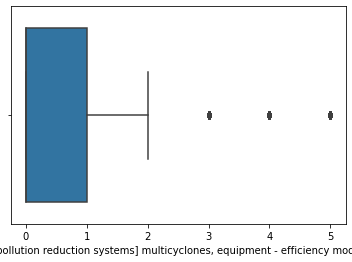

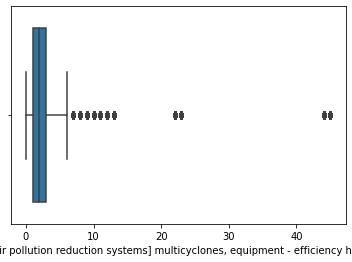

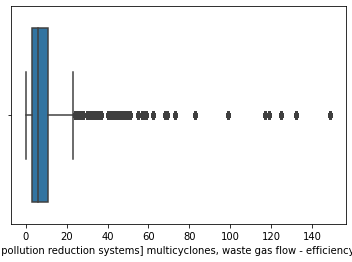

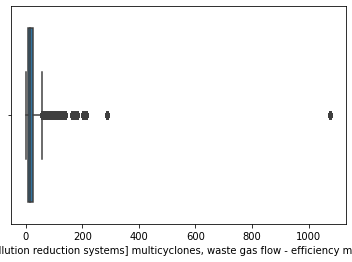

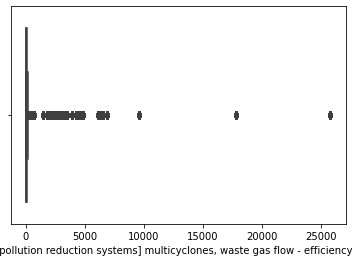

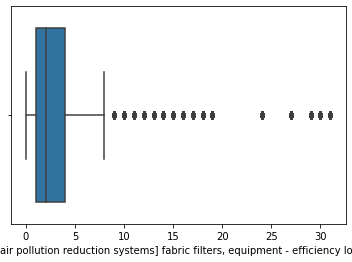

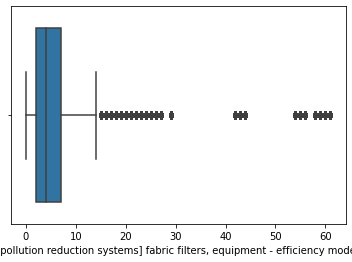

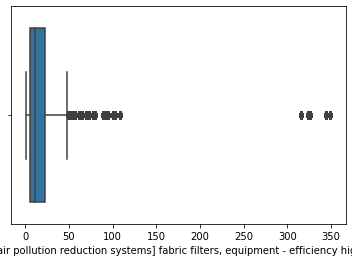

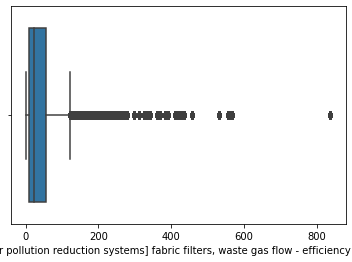

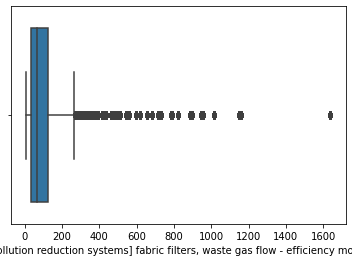

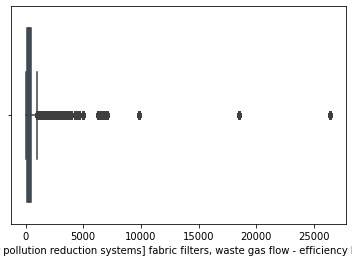

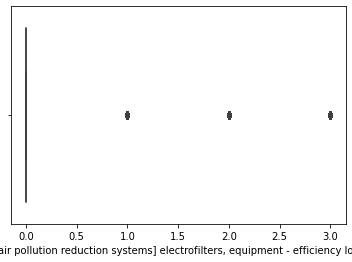

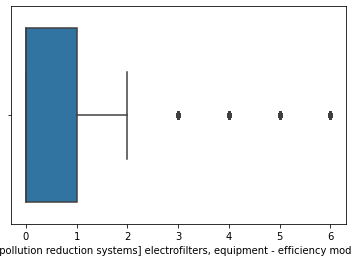

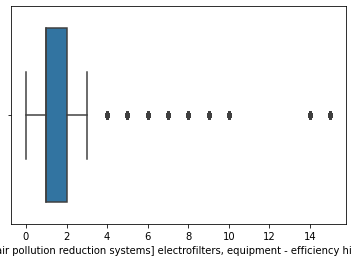

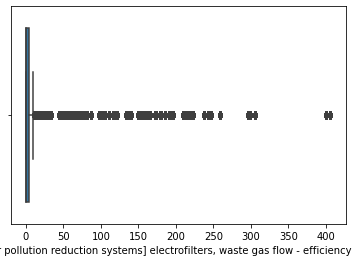

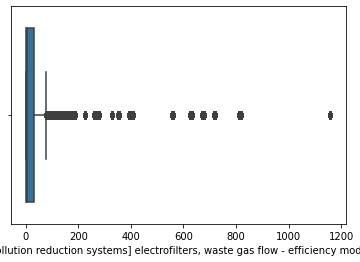

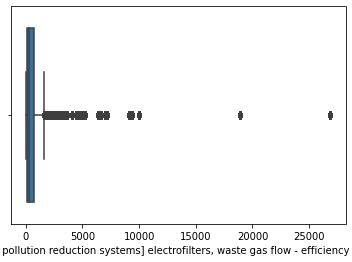

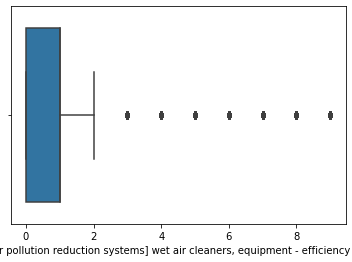

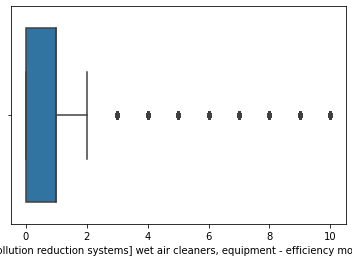

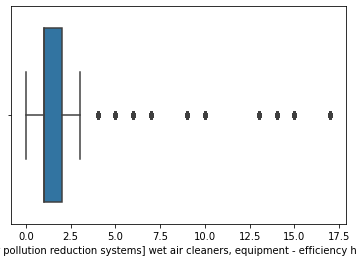

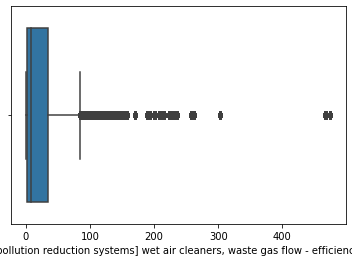

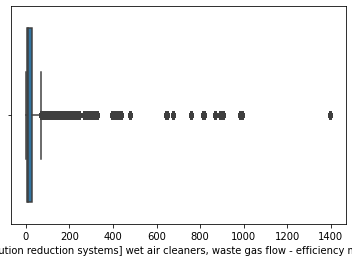

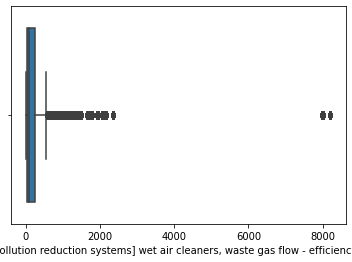

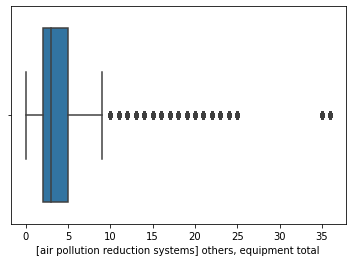

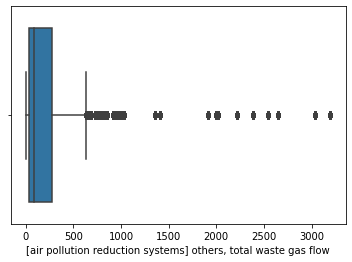

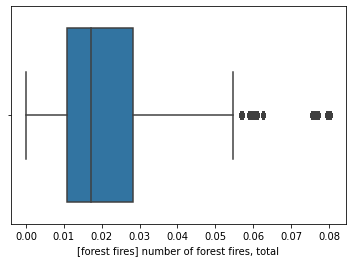

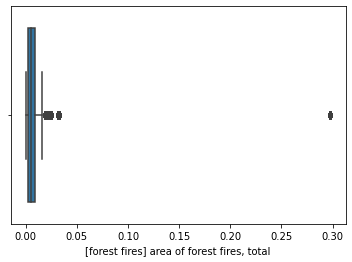

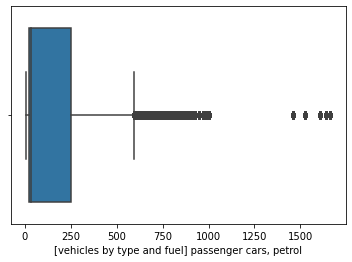

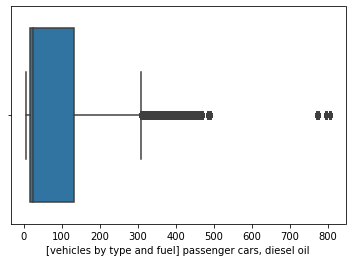

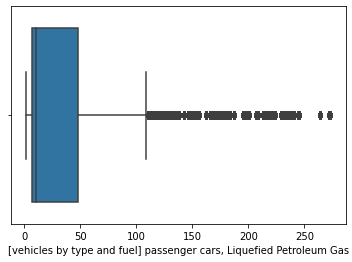

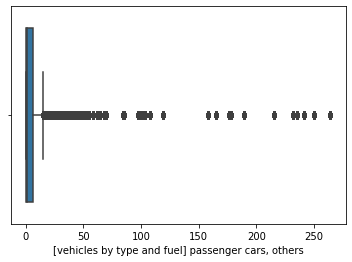

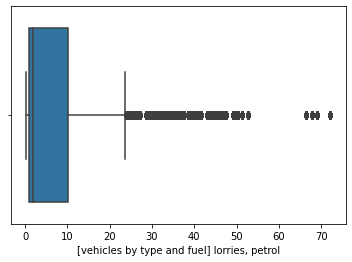

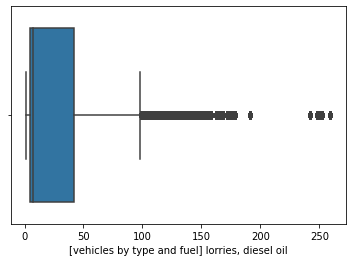

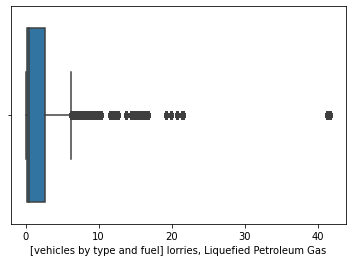

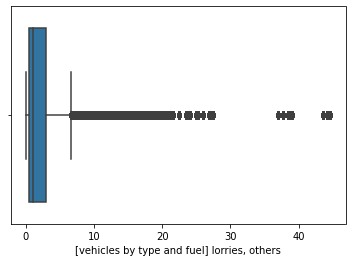

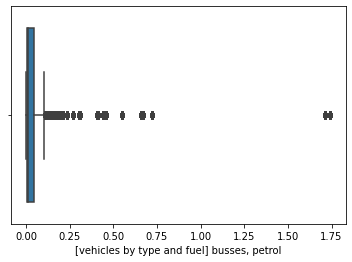

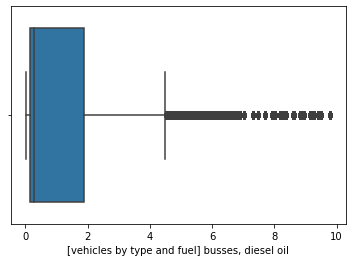

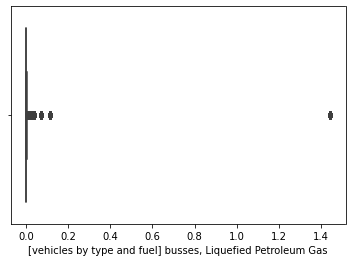

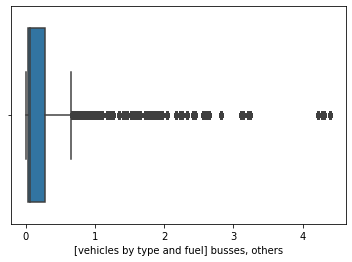

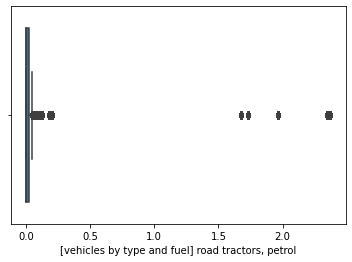

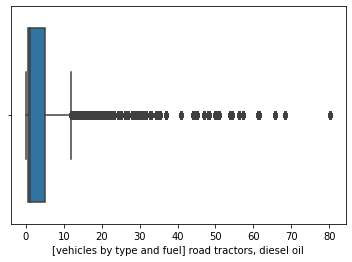

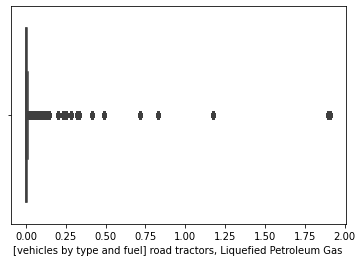

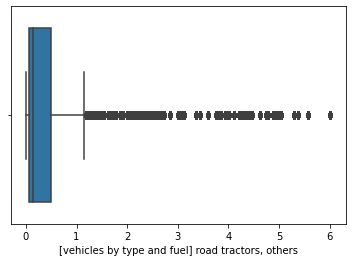

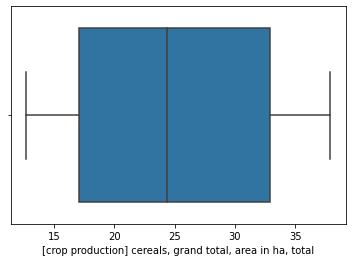

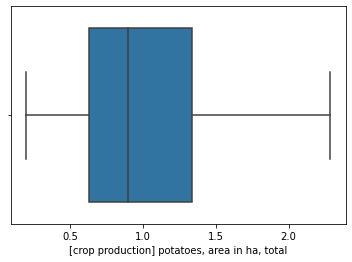

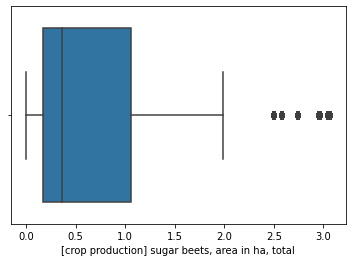

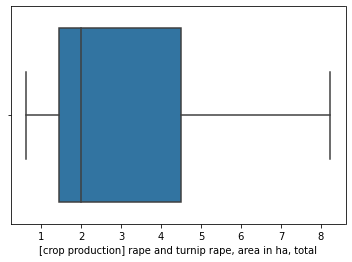

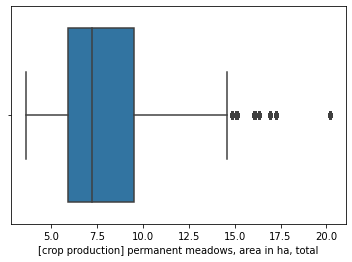

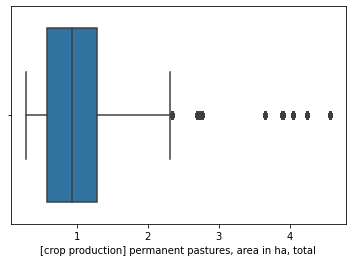

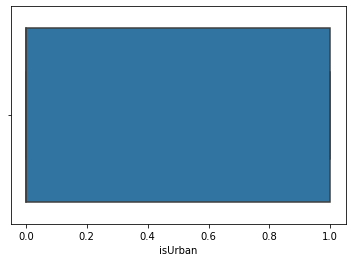

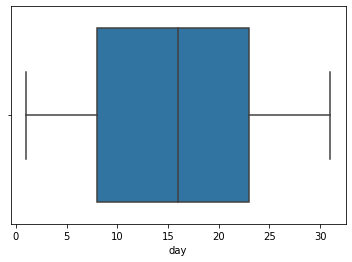

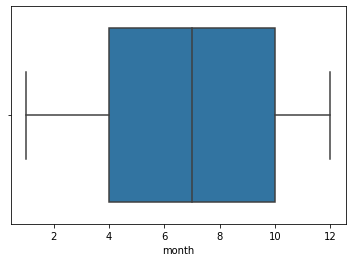

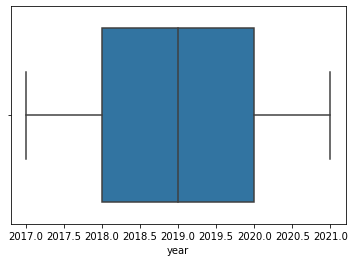

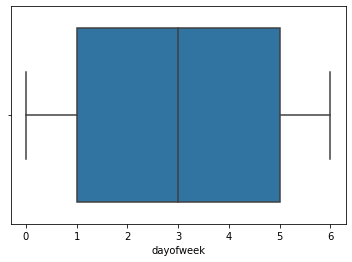

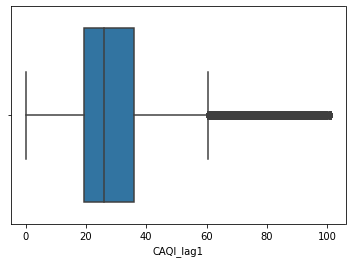

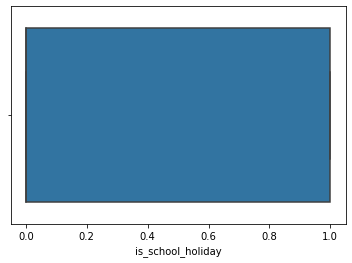

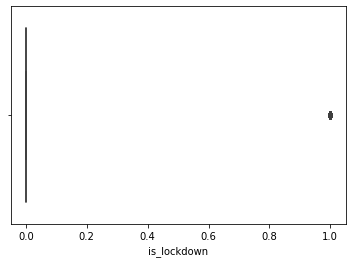

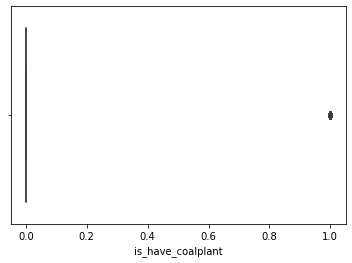

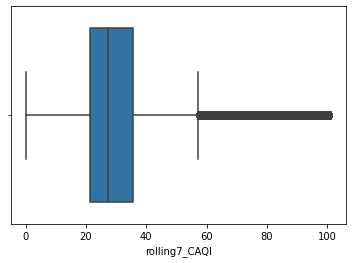

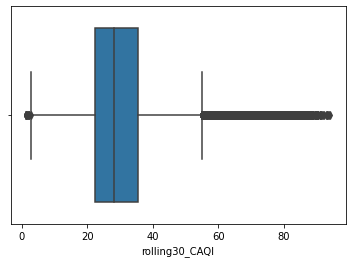

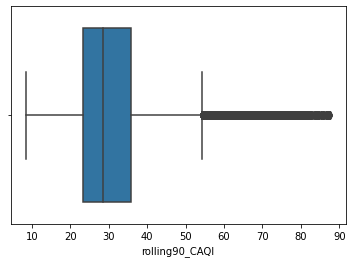

In [19]:
#check for outliers
for col in list(df.columns):

    if col != 'CAQI_level':
        datatype = df[col].dtype
        if datatype == "int64" or datatype == "float64": 
            sns.boxplot(data = df, x = col)   #sns.boxplot(data = df, x = col)
            plt.show()

In [20]:
df['season'] = LabelEncoder().fit_transform(df['season'])

In [21]:
levels = {"CAQI_level": {"vlow":0, "low":1, "medium":2, "high":3, "vhigh":3}}
df = df.replace(levels)
df

,DATE,CC,FG,HU,RR,SD,TG,[animal stock] total,[area by land] utilised agricultural area,[area by land] forests,...,dayofweek,season,CAQI_lag1,is_school_holiday,is_lockdown,is_have_coalplant,rolling7_CAQI,rolling30_CAQI,rolling90_CAQI,CAQI_level
0,2017-01-01,4.746750,0.0,88.4,1.0,0.0,1.8,44.997895,1.718015,0.631701,...,6,3,24.968064,0.0,0.0,0.0,24.968064,28.884791,47.077522,0
1,2017-01-02,6.167555,36.8,88.4,1.0,0.0,0.5,44.997895,1.718015,0.631701,...,0,3,24.968064,0.0,0.0,0.0,24.968064,28.884791,47.077522,0
2,2017-01-03,5.198131,0.0,88.4,63.0,0.0,0.3,44.997895,1.718015,0.631701,...,1,3,17.943745,0.0,0.0,0.0,21.455904,28.884791,47.077522,0
3,2017-01-04,8.432231,64.2,88.4,10.0,0.0,1.2,44.997895,1.718015,0.631701,...,2,3,17.500000,0.0,0.0,0.0,20.137270,28.884791,47.077522,0
4,2017-01-05,4.992977,0.0,82.4,2.0,1.0,-3.9,44.997895,1.718015,0.631701,...,3,3,23.941667,0.0,0.0,0.0,21.088369,28.884791,47.077522,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361543,2021-12-27,5.000000,8.5,78.1,0.0,3.0,-9.5,18.061538,4.250081,2.765926,...,0,3,89.138889,1.0,0.0,0.0,47.363294,49.618889,40.127948,3
361544,2021-12-28,7.000000,10.0,86.2,4.0,3.0,-5.6,18.061538,4.250081,2.765926,...,1,3,94.055556,1.0,0.0,0.0,58.442659,51.460741,40.859676,3
361545,2021-12-29,7.000000,5.0,88.7,2.0,3.0,-1.5,18.061538,4.250081,2.765926,...,2,3,98.250000,1.0,0.0,0.0,63.630159,52.950324,41.588009,1
361546,2021-12-30,8.000000,8.5,88.8,17.0,2.0,3.4,18.061538,4.250081,2.765926,...,3,3,35.300000,1.0,0.0,0.0,57.184921,53.293657,41.690231,0


In [22]:
df['DATE'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 361548 entries, 0 to 361547
Series name: DATE
Non-Null Count   Dtype 
--------------   ----- 
361548 non-null  object
dtypes: object(1)
memory usage: 2.8+ MB


In [23]:
#convert date object to datetime for time arithemetic
df["DATE"] = pd.to_datetime(df["DATE"])
df

,DATE,CC,FG,HU,RR,SD,TG,[animal stock] total,[area by land] utilised agricultural area,[area by land] forests,...,dayofweek,season,CAQI_lag1,is_school_holiday,is_lockdown,is_have_coalplant,rolling7_CAQI,rolling30_CAQI,rolling90_CAQI,CAQI_level
0,2017-01-01,4.746750,0.0,88.4,1.0,0.0,1.8,44.997895,1.718015,0.631701,...,6,3,24.968064,0.0,0.0,0.0,24.968064,28.884791,47.077522,0
1,2017-01-02,6.167555,36.8,88.4,1.0,0.0,0.5,44.997895,1.718015,0.631701,...,0,3,24.968064,0.0,0.0,0.0,24.968064,28.884791,47.077522,0
2,2017-01-03,5.198131,0.0,88.4,63.0,0.0,0.3,44.997895,1.718015,0.631701,...,1,3,17.943745,0.0,0.0,0.0,21.455904,28.884791,47.077522,0
3,2017-01-04,8.432231,64.2,88.4,10.0,0.0,1.2,44.997895,1.718015,0.631701,...,2,3,17.500000,0.0,0.0,0.0,20.137270,28.884791,47.077522,0
4,2017-01-05,4.992977,0.0,82.4,2.0,1.0,-3.9,44.997895,1.718015,0.631701,...,3,3,23.941667,0.0,0.0,0.0,21.088369,28.884791,47.077522,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361543,2021-12-27,5.000000,8.5,78.1,0.0,3.0,-9.5,18.061538,4.250081,2.765926,...,0,3,89.138889,1.0,0.0,0.0,47.363294,49.618889,40.127948,3
361544,2021-12-28,7.000000,10.0,86.2,4.0,3.0,-5.6,18.061538,4.250081,2.765926,...,1,3,94.055556,1.0,0.0,0.0,58.442659,51.460741,40.859676,3
361545,2021-12-29,7.000000,5.0,88.7,2.0,3.0,-1.5,18.061538,4.250081,2.765926,...,2,3,98.250000,1.0,0.0,0.0,63.630159,52.950324,41.588009,1
361546,2021-12-30,8.000000,8.5,88.8,17.0,2.0,3.4,18.061538,4.250081,2.765926,...,3,3,35.300000,1.0,0.0,0.0,57.184921,53.293657,41.690231,0


In [24]:
df["DATE"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 361548 entries, 0 to 361547
Series name: DATE
Non-Null Count   Dtype         
--------------   -----         
361548 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.8 MB


In [25]:
df['Year'] = df['DATE'].dt.year
df['Month'] = df['DATE'].dt.month
df['Day'] = df['DATE'].dt.day
df

,DATE,CC,FG,HU,RR,SD,TG,[animal stock] total,[area by land] utilised agricultural area,[area by land] forests,...,is_school_holiday,is_lockdown,is_have_coalplant,rolling7_CAQI,rolling30_CAQI,rolling90_CAQI,CAQI_level,Year,Month,Day
0,2017-01-01,4.746750,0.0,88.4,1.0,0.0,1.8,44.997895,1.718015,0.631701,...,0.0,0.0,0.0,24.968064,28.884791,47.077522,0,2017,1,1
1,2017-01-02,6.167555,36.8,88.4,1.0,0.0,0.5,44.997895,1.718015,0.631701,...,0.0,0.0,0.0,24.968064,28.884791,47.077522,0,2017,1,2
2,2017-01-03,5.198131,0.0,88.4,63.0,0.0,0.3,44.997895,1.718015,0.631701,...,0.0,0.0,0.0,21.455904,28.884791,47.077522,0,2017,1,3
3,2017-01-04,8.432231,64.2,88.4,10.0,0.0,1.2,44.997895,1.718015,0.631701,...,0.0,0.0,0.0,20.137270,28.884791,47.077522,0,2017,1,4
4,2017-01-05,4.992977,0.0,82.4,2.0,1.0,-3.9,44.997895,1.718015,0.631701,...,0.0,0.0,0.0,21.088369,28.884791,47.077522,1,2017,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361543,2021-12-27,5.000000,8.5,78.1,0.0,3.0,-9.5,18.061538,4.250081,2.765926,...,1.0,0.0,0.0,47.363294,49.618889,40.127948,3,2021,12,27
361544,2021-12-28,7.000000,10.0,86.2,4.0,3.0,-5.6,18.061538,4.250081,2.765926,...,1.0,0.0,0.0,58.442659,51.460741,40.859676,3,2021,12,28
361545,2021-12-29,7.000000,5.0,88.7,2.0,3.0,-1.5,18.061538,4.250081,2.765926,...,1.0,0.0,0.0,63.630159,52.950324,41.588009,1,2021,12,29
361546,2021-12-30,8.000000,8.5,88.8,17.0,2.0,3.4,18.061538,4.250081,2.765926,...,1.0,0.0,0.0,57.184921,53.293657,41.690231,0,2021,12,30


In [26]:
labels = df.pop("CAQI_level")
df["CAQI_level"] = labels
df

,DATE,CC,FG,HU,RR,SD,TG,[animal stock] total,[area by land] utilised agricultural area,[area by land] forests,...,is_school_holiday,is_lockdown,is_have_coalplant,rolling7_CAQI,rolling30_CAQI,rolling90_CAQI,Year,Month,Day,CAQI_level
0,2017-01-01,4.746750,0.0,88.4,1.0,0.0,1.8,44.997895,1.718015,0.631701,...,0.0,0.0,0.0,24.968064,28.884791,47.077522,2017,1,1,0
1,2017-01-02,6.167555,36.8,88.4,1.0,0.0,0.5,44.997895,1.718015,0.631701,...,0.0,0.0,0.0,24.968064,28.884791,47.077522,2017,1,2,0
2,2017-01-03,5.198131,0.0,88.4,63.0,0.0,0.3,44.997895,1.718015,0.631701,...,0.0,0.0,0.0,21.455904,28.884791,47.077522,2017,1,3,0
3,2017-01-04,8.432231,64.2,88.4,10.0,0.0,1.2,44.997895,1.718015,0.631701,...,0.0,0.0,0.0,20.137270,28.884791,47.077522,2017,1,4,0
4,2017-01-05,4.992977,0.0,82.4,2.0,1.0,-3.9,44.997895,1.718015,0.631701,...,0.0,0.0,0.0,21.088369,28.884791,47.077522,2017,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361543,2021-12-27,5.000000,8.5,78.1,0.0,3.0,-9.5,18.061538,4.250081,2.765926,...,1.0,0.0,0.0,47.363294,49.618889,40.127948,2021,12,27,3
361544,2021-12-28,7.000000,10.0,86.2,4.0,3.0,-5.6,18.061538,4.250081,2.765926,...,1.0,0.0,0.0,58.442659,51.460741,40.859676,2021,12,28,3
361545,2021-12-29,7.000000,5.0,88.7,2.0,3.0,-1.5,18.061538,4.250081,2.765926,...,1.0,0.0,0.0,63.630159,52.950324,41.588009,2021,12,29,1
361546,2021-12-30,8.000000,8.5,88.8,17.0,2.0,3.4,18.061538,4.250081,2.765926,...,1.0,0.0,0.0,57.184921,53.293657,41.690231,2021,12,30,0


In [27]:
#Function for training, validation and test split
def train_test_split(df):
    
    train = df[(df["DATE"] >= "01-01-2017") & (df["DATE"] <= "31-05-2020")]
    val = df[(df["DATE"] >= "02-06-2020") & (df["DATE"] <= "28-02-2021")]
    test = df[(df["DATE"] >= "02-03-2021") & (df["DATE"] <= "31-12-2021")]
    
    print(len(train))
    print(len(val))
    print(len(test))
    
    train.pop("DATE")
    val.pop("DATE")
    test.pop("DATE")
    
    leng = len(train.columns) - 1
    x_train = train.iloc[:,0:leng] 
    y_train = train.iloc[:,leng]   
    
    
    leng = len(val.columns) - 1
    x_val = val.iloc[:,0:leng] 
    y_val = val.iloc[:,leng]  

    leng = len(test.columns) - 1
    x_test = test.iloc[:,0:leng] 
    y_test = test.iloc[:,leng]   

    
    return x_train, y_train, x_val, y_val, x_test, y_test

In [42]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,101
0,-0.166081,-0.894071,0.913493,-0.299323,-0.187208,-0.848165,0.957563,-0.408851,-0.609255,-0.314736,...,-1.235447,1.498048,1.331478,-0.385288,-0.477432,-0.237617,1.273662,-1.235447,-1.470735,-1.673534
1,0.486786,0.557111,0.913493,-0.299323,-0.187208,-1.006319,0.957563,-0.408851,-0.609255,-0.314736,...,-1.235447,-1.500452,1.331478,-0.385288,-0.477432,-0.237617,1.273662,-1.235447,-1.470735,-1.559838
2,0.041331,-0.894071,0.913493,1.440374,-0.187208,-1.030650,0.957563,-0.408851,-0.609255,-0.314736,...,-1.235447,-1.000702,1.331478,-0.805451,-0.735321,-0.237617,1.273662,-1.235447,-1.470735,-1.446141
3,1.527415,1.637611,0.913493,-0.046787,-0.187208,-0.921159,0.957563,-0.408851,-0.609255,-0.314736,...,-1.235447,-0.500952,1.331478,-0.831994,-0.832145,-0.237617,1.273662,-1.235447,-1.470735,-1.332445
4,-0.052938,-0.894071,0.436517,-0.271264,-0.127828,-1.541611,0.957563,-0.408851,-0.609255,-0.314736,...,-1.235447,-0.001202,1.331478,-0.446683,-0.762308,-0.237617,1.273662,-1.235447,-1.470735,-1.218749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246901,-0.509216,-0.263122,1.167881,-0.327383,-0.187208,0.550894,-0.517568,0.912670,1.423882,-0.368445,...,1.744441,-0.500952,-0.482125,-0.670492,-0.911456,-0.654823,0.067938,1.744441,-0.316546,1.282572
246902,-0.509216,0.072069,1.199679,-0.327383,-0.187208,0.453569,-0.517568,0.912670,1.423882,-0.368445,...,1.744441,-0.001202,-0.482125,-0.676474,-0.897820,-0.681282,0.037805,1.744441,-0.316546,1.396268
246903,0.409793,-0.499728,1.374570,-0.327383,-0.187208,0.392740,-0.517568,0.912670,1.423882,-0.368445,...,1.744441,0.498548,-0.482125,-0.688437,-0.918799,-0.709163,0.007297,1.744441,-0.316546,1.509964
246904,0.869298,-0.394570,1.088385,5.452902,-0.187208,0.100762,-0.517568,0.912670,1.423882,-0.368445,...,1.744441,0.998298,-0.482125,0.113090,-0.796070,-0.691809,0.018637,1.744441,-0.316546,1.623661


In [28]:
def feat_sel(df, thresh):
    s_df = df.copy()
    dates = s_df.pop("DATE")
    #labels = df['diagnosis'].tolist()
    labels = s_df.pop("CAQI_level")
    selector = VarianceThreshold(threshold=thresh) #using a threshold of 90 percent
    Var = selector.fit_transform(s_df)

    sel_df = s_df[s_df.columns[selector.get_support(indices=True)]]
    #print(list(sel_df.columns))
    #if 'diagnosis' not in list(sel_df.columns):
    sel_df['DATE'] = dates
    sel_df['CAQI_level'] = labels
    
    return sel_df

In [101]:
s_df = df.copy()
s_df = feat_sel(df, 0.5)
s_df

<ipython-input-28-a82271ea2340>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_df['DATE'] = dates
<ipython-input-28-a82271ea2340>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_df['CAQI_level'] = labels


,CC,FG,HU,RR,SD,TG,[animal stock] total,[area by land] utilised agricultural area,[area by land] forests,[emission of particulates] fuel combustion,...,season,CAQI_lag1,rolling7_CAQI,rolling30_CAQI,rolling90_CAQI,Year,Month,Day,DATE,CAQI_level
0,4.746750,0.0,88.4,1.0,0.0,1.8,44.997895,1.718015,0.631701,0.052632,...,3,24.968064,24.968064,28.884791,47.077522,2017,1,1,2017-01-01,0
1,6.167555,36.8,88.4,1.0,0.0,0.5,44.997895,1.718015,0.631701,0.052632,...,3,24.968064,24.968064,28.884791,47.077522,2017,1,2,2017-01-02,0
2,5.198131,0.0,88.4,63.0,0.0,0.3,44.997895,1.718015,0.631701,0.052632,...,3,17.943745,21.455904,28.884791,47.077522,2017,1,3,2017-01-03,0
3,8.432231,64.2,88.4,10.0,0.0,1.2,44.997895,1.718015,0.631701,0.052632,...,3,17.500000,20.137270,28.884791,47.077522,2017,1,4,2017-01-04,0
4,4.992977,0.0,82.4,2.0,1.0,-3.9,44.997895,1.718015,0.631701,0.052632,...,3,23.941667,21.088369,28.884791,47.077522,2017,1,5,2017-01-05,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361543,5.000000,8.5,78.1,0.0,3.0,-9.5,18.061538,4.250081,2.765926,0.000962,...,3,89.138889,47.363294,49.618889,40.127948,2021,12,27,2021-12-27,3
361544,7.000000,10.0,86.2,4.0,3.0,-5.6,18.061538,4.250081,2.765926,0.000962,...,3,94.055556,58.442659,51.460741,40.859676,2021,12,28,2021-12-28,3
361545,7.000000,5.0,88.7,2.0,3.0,-1.5,18.061538,4.250081,2.765926,0.000962,...,3,98.250000,63.630159,52.950324,41.588009,2021,12,29,2021-12-29,1
361546,8.000000,8.5,88.8,17.0,2.0,3.4,18.061538,4.250081,2.765926,0.000962,...,3,35.300000,57.184921,53.293657,41.690231,2021,12,30,2021-12-30,0


In [102]:
x_train, y_train, x_val, y_val, x_test, y_test = train_test_split(s_df)

246906
77022
65736


/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:52: UserWarning: Parsing '31-05-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.le)
/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:52: UserWarning: Parsing '28-02-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.le)
/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:52: UserWarning: Parsing '31-12-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.le)


In [103]:
#pca = PCA()
#x_train = pca.fit_transform(x_train)
#x_val = pca.fit_transform(x_val)
#x_test = pca.fit_transform(x_test)
#x_train

In [104]:
x_train

,CC,FG,HU,RR,SD,TG,[animal stock] total,[area by land] utilised agricultural area,[area by land] forests,[emission of particulates] fuel combustion,...,year,dayofweek,season,CAQI_lag1,rolling7_CAQI,rolling30_CAQI,rolling90_CAQI,Year,Month,Day
0,4.746750,0.000000,88.4,1.0,0.0,1.8,44.997895,1.718015,0.631701,0.052632,...,2017,6,3,24.968064,24.968064,28.884791,47.077522,2017,1,1
1,6.167555,36.800000,88.4,1.0,0.0,0.5,44.997895,1.718015,0.631701,0.052632,...,2017,0,3,24.968064,24.968064,28.884791,47.077522,2017,1,2
2,5.198131,0.000000,88.4,63.0,0.0,0.3,44.997895,1.718015,0.631701,0.052632,...,2017,1,3,17.943745,21.455904,28.884791,47.077522,2017,1,3
3,8.432231,64.200000,88.4,10.0,0.0,1.2,44.997895,1.718015,0.631701,0.052632,...,2017,2,3,17.500000,20.137270,28.884791,47.077522,2017,1,4
4,4.992977,0.000000,82.4,2.0,1.0,-3.9,44.997895,1.718015,0.631701,0.052632,...,2017,3,3,23.941667,21.088369,28.884791,47.077522,2017,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360964,4.000000,16.000000,91.6,0.0,0.0,13.3,18.638462,4.258514,2.765926,0.000962,...,2020,2,1,20.200000,19.057143,23.996667,33.256281,2020,5,27
360965,4.000000,24.500000,92.0,0.0,0.0,12.5,18.638462,4.258514,2.765926,0.000962,...,2020,3,1,20.100000,19.242857,23.686667,32.910864,2020,5,28
360966,6.000000,10.000000,94.2,0.0,0.0,12.0,18.638462,4.258514,2.765926,0.000962,...,2020,4,1,19.900000,18.957143,23.360000,32.561142,2020,5,29
360967,7.000000,12.666667,90.6,206.0,0.0,9.6,18.638462,4.258514,2.765926,0.000962,...,2020,5,1,33.300000,20.628571,23.563333,32.691142,2020,5,30


In [105]:
#scale all input variable
scaler = StandardScaler()

x_train = pd.DataFrame(scaler.fit_transform(x_train))
x_test = pd.DataFrame(scaler.fit_transform(x_test))
x_val = pd.DataFrame(scaler.fit_transform(x_val))

In [106]:
def model_selection(mo):
    if mo.lower() == "rf":
        model = RandomForestClassifier()
    elif mo.lower() == "lr":
        model = LogisticRegression(random_state=None, max_iter=400, solver='liblinear')
    elif mo.lower() == "knn":
        model = KNeighborsClassifier(n_neighbors=7, metric='manhattan')
    elif mo.lower() == "nb":
        model = GaussianNB()
    elif mo.lower() == "svc":
        model = SVC(kernel='linear')
    else:
        print("wrong model selected")
        exit(0)
    return model

In [107]:
#rf_model = RandomForestClassifier(max_depth = None, max_features = 7, min_samples_leaf = 2, min_samples_split = 3, n_estimators = 150)  #100
model = model_selection("rf")
result = model.fit(x_train, y_train)

In [108]:
eval_ = model.score(x_test, y_test)
preds = model.predict(x_test)
#auc = roc_auc_score(y_test, preds)

print(eval_)

0.7136120238529877


In [109]:
print(accuracy_score(y_test, preds))

0.7136120238529877


In [110]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.86      0.70      0.77     33003
           1       0.63      0.80      0.71     26464
           2       0.52      0.44      0.48      5359
           3       0.42      0.23      0.30       910

    accuracy                           0.71     65736
   macro avg       0.61      0.54      0.56     65736
weighted avg       0.73      0.71      0.71     65736



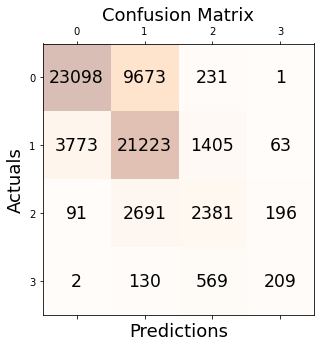

In [38]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=preds)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

        
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.savefig(f"{path}/RF_Confusion_Matrix.jpg")
plt.show()

In [39]:
#Get column list for decoding feature importance index
col_list = list(df.columns)
col_list

['DATE',
 'CC',
 'FG',
 'HU',
 'RR',
 'SD',
 'TG',
 '[animal stock] total',
 '[area by land] utilised agricultural area',
 '[area by land] forests',
 '[area by land] residential areas',
 '[area by land] industrial lands',
 '[area by land] recreational and rest areas',
 '[area by land] lands under waters',
 '[area by land] wasteland',
 '[area by land] other area',
 '[emission of particulates] fugitive',
 '[emission of particulates] fuel combustion',
 '[emission of particulates] cement/lime and refractory materials',
 '[emission of particulates] silicon',
 '[emission of particulates] chemical fertilizers',
 '[emission of particulates] surface-active agents',
 '[emission of particulates] carbon and graphite, soot',
 '[emission of pollutant gases] fugitive',
 '[emission of pollutant gases] sulphur dioxide',
 '[emission of pollutant gases] nitrogen oxides',
 '[emission of pollutant gases] carbon monoxide',
 '[emission of pollutant gases] carbon dioxide',
 '[emission of pollutant gases] meth

In [41]:
#Feature importance
importances = pd.DataFrame(data={
    'Attribute': x_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
#print(importances)
imp = pd.DataFrame(importances)
imp

,Attribute,Importance
95,95,0.169191
96,96,0.086079
97,97,0.070341
5,5,0.053983
98,98,0.049326
...,...,...
49,49,0.000622
61,61,0.000553
25,25,0.000435
26,26,0.000422


In [43]:
#Extract column names from feature importance index
imp_dict = dict(list(zip(imp.Attribute, imp.Importance)))
new_dict = {}
for key in imp_dict.keys():
    #print(key,imp_dict[key])
    nk = col_list[key]
    #print(nk)
    new_dict[nk] = imp_dict[key]
    
new_dict

{'[vehicles by type and fuel] passenger cars, others': 0.16919136615033958,
 '[vehicles by type and fuel] lorries, petrol': 0.08607872947389146,
 '[vehicles by type and fuel] lorries, diesel oil': 0.07034075193695159,
 'SD': 0.05398278998620814,
 '[vehicles by type and fuel] lorries, Liquefied Petroleum Gas': 0.049325833342433546,
 'FG': 0.038530243952771465,
 '[forest fires] number of forest fires, total': 0.032454534706396566,
 '[vehicles by type and fuel] busses, diesel oil': 0.03228592581029688,
 'CC': 0.029832260598492474,
 'DATE': 0.028813464698139977,
 '[vehicles by type and fuel] passenger cars, diesel oil': 0.02442035883836279,
 '[vehicles by type and fuel] busses, petrol': 0.02226337835886675,
 '[forest fires] area of forest fires, total': 0.02225731954265934,
 'HU': 0.017890973018885523,
 '[vehicles by type and fuel] passenger cars, Liquefied Petroleum Gas': 0.0103207628036973,
 'RR': 0.009169745812871591,
 '[air pollution reduction systems] wet air cleaners, waste gas flow 

In [44]:
nl = list(new_dict.keys())
nv = list(new_dict.values())

In [45]:
df_fimp = pd.DataFrame(list(zip(nl, nv)),
               columns =['Features', 'Importances'])

df_fimp

,Features,Importances
0,"[vehicles by type and fuel] passenger cars, ot...",0.169191
1,"[vehicles by type and fuel] lorries, petrol",0.086079
2,"[vehicles by type and fuel] lorries, diesel oil",0.070341
3,SD,0.053983
4,"[vehicles by type and fuel] lorries, Liquefied...",0.049326
...,...,...
97,"[total vehicles] motorcycles, engine capacity ...",0.000622
98,"[air pollution reduction systems] cyclones, wa...",0.000553
99,[emission of pollutant gases] nitrogen oxides,0.000435
100,[emission of pollutant gases] carbon monoxide,0.000422


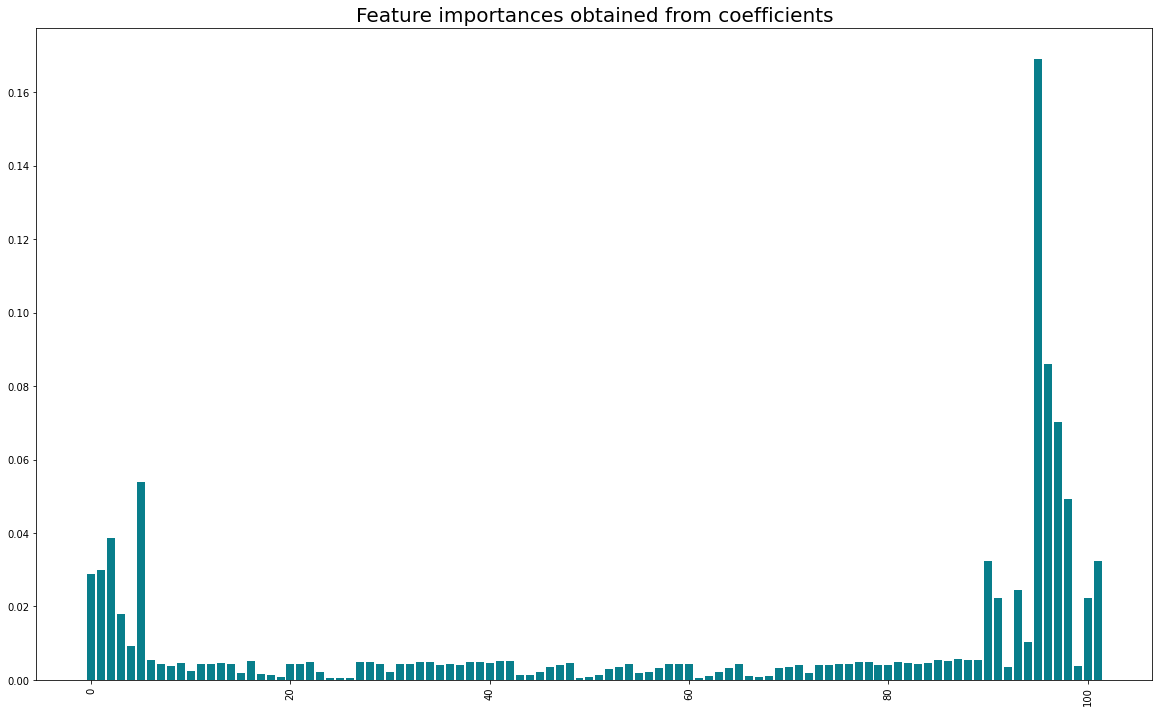

In [50]:
plt.figure(figsize=(20, 12))
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.savefig(f"{path}/RF_feature_importance.jpg")
plt.show()

In [48]:
#save feature importance to csv file
df_fimp.to_csv(f"{path}/Random_Forest_Feature_Importance.csv", index = False)

### Retrain model based on threshold for feature impotance

In [59]:
df_fimp = pd.read_csv(f"{path}/Random_Forest_Feature_Importance.csv")
df_fimp

,Features,Importances
0,"[vehicles by type and fuel] passenger cars, ot...",0.169191
1,"[vehicles by type and fuel] lorries, petrol",0.086079
2,"[vehicles by type and fuel] lorries, diesel oil",0.070341
3,SD,0.053983
4,"[vehicles by type and fuel] lorries, Liquefied...",0.049326
...,...,...
97,"[total vehicles] motorcycles, engine capacity ...",0.000622
98,"[air pollution reduction systems] cyclones, wa...",0.000553
99,[emission of pollutant gases] nitrogen oxides,0.000435
100,[emission of pollutant gases] carbon monoxide,0.000422


In [81]:
def feat_import(s_df, df_fimp, thresh):

    c_df = s_df.copy()
    dates = c_df.pop("DATE")
    labels = c_df.pop("CAQI_level")
    ident = df_fimp[df_fimp["Importances"] >=  thresh]
    #display(ident)

    imp_feat = ident["Features"].tolist()
    #print(imp_feat)

    new_df = c_df.filter(items=imp_feat)
    #c_df[imp_feat]
    new_df["DATE"] = dates
    new_df["CAQI_level"] = labels

    return new_df
    

In [96]:
new_df = feat_import(s_df, df_fimp, 0.004)
new_df

,"[vehicles by type and fuel] passenger cars, others","[vehicles by type and fuel] lorries, petrol","[vehicles by type and fuel] lorries, diesel oil",SD,"[vehicles by type and fuel] lorries, Liquefied Petroleum Gas",FG,"[vehicles by type and fuel] busses, diesel oil",CC,"[vehicles by type and fuel] passenger cars, diesel oil",HU,...,[animal stock] total,[plants of significant nuisance] possessing systems to reduce the emission of particulates,"[air pollution reduction systems] fabric filters, waste gas flow - efficiency low","[air pollution reduction systems] fabric filters, equipment - efficiency moderate",[production of electricity] total,"[air pollution reduction systems] electrofilters, waste gas flow - efficiency moderate",[production of electricity] water power plants,"[air pollution reduction systems] fabric filters, waste gas flow - efficiency moderate",DATE,CAQI_level
0,0.277895,1.745263,5.244211,0.0,0.404211,0.0,0.071579,4.746750,18.656842,88.4,...,44.997895,2.0,3.0,4.0,192.276882,19.0,0.0,61.0,2017-01-01,0
1,0.277895,1.745263,5.244211,0.0,0.404211,36.8,0.071579,6.167555,18.656842,88.4,...,44.997895,2.0,3.0,4.0,192.276882,19.0,0.0,61.0,2017-01-02,0
2,0.277895,1.745263,5.244211,0.0,0.404211,0.0,0.071579,5.198131,18.656842,88.4,...,44.997895,2.0,3.0,4.0,192.276882,19.0,0.0,61.0,2017-01-03,0
3,0.277895,1.745263,5.244211,0.0,0.404211,64.2,0.071579,8.432231,18.656842,88.4,...,44.997895,2.0,3.0,4.0,192.276882,19.0,0.0,61.0,2017-01-04,0
4,0.277895,1.745263,5.244211,1.0,0.404211,0.0,0.071579,4.992977,18.656842,82.4,...,44.997895,2.0,3.0,4.0,192.276882,19.0,0.0,61.0,2017-01-05,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361543,1.415385,1.771154,8.484615,3.0,0.418269,8.5,0.455769,5.000000,29.143269,78.1,...,18.061538,7.0,107.0,8.0,851.847079,87.0,0.0,222.0,2021-12-27,3
361544,1.415385,1.771154,8.484615,3.0,0.418269,10.0,0.455769,7.000000,29.143269,86.2,...,18.061538,7.0,107.0,8.0,851.847079,87.0,0.0,222.0,2021-12-28,3
361545,1.415385,1.771154,8.484615,3.0,0.418269,5.0,0.455769,7.000000,29.143269,88.7,...,18.061538,7.0,107.0,8.0,851.847079,87.0,0.0,222.0,2021-12-29,1
361546,1.415385,1.771154,8.484615,2.0,0.418269,8.5,0.455769,8.000000,29.143269,88.8,...,18.061538,7.0,107.0,8.0,851.847079,87.0,0.0,222.0,2021-12-30,0


In [97]:
x_train, y_train, x_val, y_val, x_test, y_test = train_test_split(new_df)
x_train

246906
77022
65736


/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:52: UserWarning: Parsing '31-05-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.le)
/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:52: UserWarning: Parsing '28-02-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.le)
/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:52: UserWarning: Parsing '31-12-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.le)


,"[vehicles by type and fuel] passenger cars, others","[vehicles by type and fuel] lorries, petrol","[vehicles by type and fuel] lorries, diesel oil",SD,"[vehicles by type and fuel] lorries, Liquefied Petroleum Gas",FG,"[vehicles by type and fuel] busses, diesel oil",CC,"[vehicles by type and fuel] passenger cars, diesel oil",HU,...,[total vehicles] special purpose vehicles (including sanitary),"[air pollution reduction systems] cyclones, equipment - efficiency moderate",[animal stock] total,[plants of significant nuisance] possessing systems to reduce the emission of particulates,"[air pollution reduction systems] fabric filters, waste gas flow - efficiency low","[air pollution reduction systems] fabric filters, equipment - efficiency moderate",[production of electricity] total,"[air pollution reduction systems] electrofilters, waste gas flow - efficiency moderate",[production of electricity] water power plants,"[air pollution reduction systems] fabric filters, waste gas flow - efficiency moderate"
0,0.277895,1.745263,5.244211,0.0,0.404211,0.000000,0.071579,4.746750,18.656842,88.4,...,0.395789,2.0,44.997895,2.0,3.0,4.0,192.276882,19.0,0.0,61.0
1,0.277895,1.745263,5.244211,0.0,0.404211,36.800000,0.071579,6.167555,18.656842,88.4,...,0.395789,2.0,44.997895,2.0,3.0,4.0,192.276882,19.0,0.0,61.0
2,0.277895,1.745263,5.244211,0.0,0.404211,0.000000,0.071579,5.198131,18.656842,88.4,...,0.395789,2.0,44.997895,2.0,3.0,4.0,192.276882,19.0,0.0,61.0
3,0.277895,1.745263,5.244211,0.0,0.404211,64.200000,0.071579,8.432231,18.656842,88.4,...,0.395789,2.0,44.997895,2.0,3.0,4.0,192.276882,19.0,0.0,61.0
4,0.277895,1.745263,5.244211,1.0,0.404211,0.000000,0.071579,4.992977,18.656842,82.4,...,0.395789,2.0,44.997895,2.0,3.0,4.0,192.276882,19.0,0.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360964,1.095192,1.781731,8.074038,0.0,0.414423,16.000000,0.449038,4.000000,28.018269,91.6,...,0.710577,2.0,18.638462,6.0,164.0,8.0,678.880716,72.0,0.0,196.0
360965,1.095192,1.781731,8.074038,0.0,0.414423,24.500000,0.449038,4.000000,28.018269,92.0,...,0.710577,2.0,18.638462,6.0,164.0,8.0,678.880716,72.0,0.0,196.0
360966,1.095192,1.781731,8.074038,0.0,0.414423,10.000000,0.449038,6.000000,28.018269,94.2,...,0.710577,2.0,18.638462,6.0,164.0,8.0,678.880716,72.0,0.0,196.0
360967,1.095192,1.781731,8.074038,0.0,0.414423,12.666667,0.449038,7.000000,28.018269,90.6,...,0.710577,2.0,18.638462,6.0,164.0,8.0,678.880716,72.0,0.0,196.0


In [95]:

#scale all input variable
scaler = StandardScaler()

x_train = pd.DataFrame(scaler.fit_transform(x_train))
x_test = pd.DataFrame(scaler.fit_transform(x_test))
x_val = pd.DataFrame(scaler.fit_transform(x_val))

In [99]:
#rf_model = RandomForestClassifier(max_depth = None, max_features = 7, min_samples_leaf = 2, min_samples_split = 3, n_estimators = 150)  #100
model = model_selection("rf")
result = model.fit(x_train, y_train)


In [100]:

eval_ = model.score(x_test, y_test)
preds = model.predict(x_test)
#auc = roc_auc_score(y_test, preds)

print(eval_)

0.6248478763539005


In [87]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.74      0.65      0.69     33003
           1       0.55      0.69      0.61     26464
           2       0.41      0.23      0.29      5359
           3       0.33      0.15      0.21       910

    accuracy                           0.63     65736
   macro avg       0.51      0.43      0.45     65736
weighted avg       0.63      0.63      0.62     65736

